**Name: G.Chethan Kumar**

**Reg.no: 212222240022**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

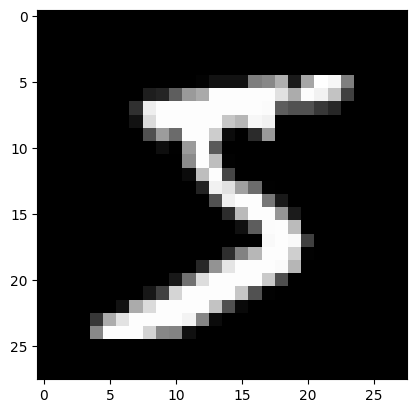

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

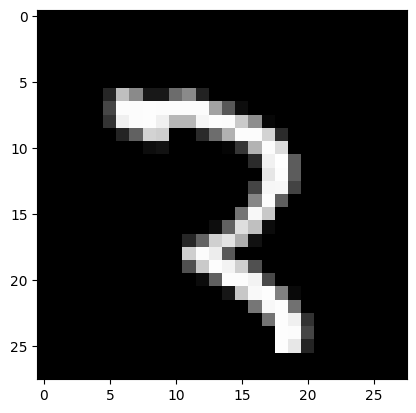

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: G.Chethan Kumar

Reg.no: 212222240022

In [ ]:
ckmodel = keras.Sequential()
ckmodel.add(layers.Input(shape=(28,28,1)))
ckmodel.add(layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
ckmodel.add(layers.MaxPool2D(pool_size=(2,2)))
ckmodel.add(layers.Flatten())
ckmodel.add(layers.Dense(16,activation='relu'))
ckmodel.add(layers.Dense(32,activation='relu'))
ckmodel.add(layers.Dense(10,activation='softmax'))

In [ ]:
ckmodel.summary()
ckmodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
ckmodel.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=256, validation_data=(X_test_scaled,y_test_onehot))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                73744     
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                      

212222240022 G Chethan Kumar
212222240022 G Chethan Kumar


<Axes: >

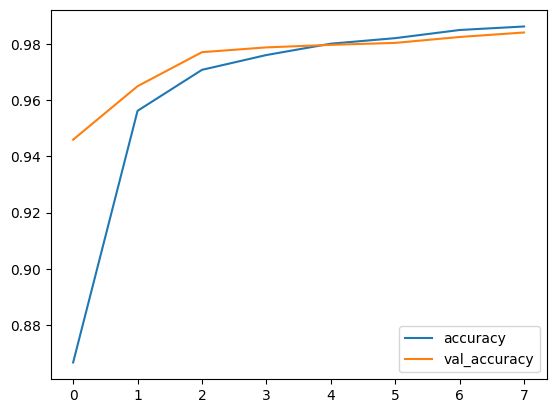

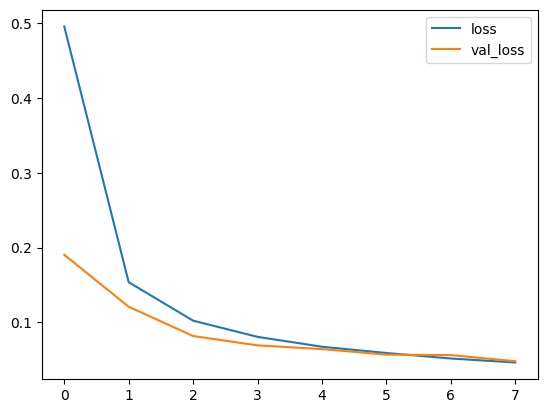

In [ ]:
metrics = pd.DataFrame(ckmodel.history.history)
metrics.head()
print("212222240022 G Chethan Kumar")
metrics[['accuracy','val_accuracy']].plot()
print("212222240022 G Chethan Kumar")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(ckmodel.predict(X_test_scaled), axis=1)
print("212222240022 G Chethan Kumar")
print(confusion_matrix(y_test,x_test_predictions))
print("212222240022 G Chethan Kumar")
print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 2s 5ms/step
212222240022 G Chethan Kumar
[[ 972    1    1    0    0    1    2    1    2    0]
 [   0 1129    3    1    0    0    1    1    0    0]
 [   3    3 1009    4    2    0    0    4    6    1]
 [   0    0    2  998    0    4    0    4    2    0]
 [   1    0    3    0  964    0    2    1    2    9]
 [   2    0    1    9    0  877    3    0    0    0]
 [   3    2    0    0    2    3  945    0    3    0]
 [   0    3    5    2    0    0    0 1016    2    0]
 [   4    0    3    1    1    2    1    9  951    2]
 [   1    3    0    3    7    2    0   12    2  979]]
212222240022 G Chethan Kumar
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.

In [ ]:
img = image.load_img('img.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

1/1 [==============================] - 0s 25ms/step
[8]


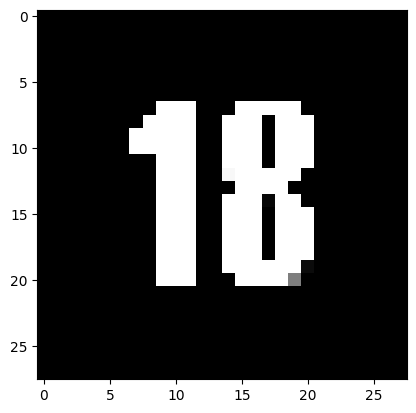

In [ ]:
x_single_prediction = np.argmax(ckmodel.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

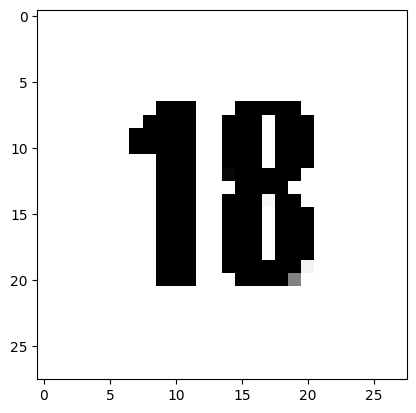

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')